In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,) #reshaped 2d to 1d.
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

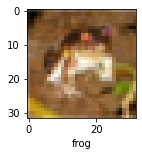

In [9]:
plot_sample(X_train, y_train, 0)

In [10]:
# Normalize the images to a number from 0 to 1. 
# Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.
# Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(4000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history_ann_model = ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9550 - accuracy: 0.2790
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7485 - accuracy: 0.3684
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6603 - accuracy: 0.4022
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5910 - accuracy: 0.4281
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5419 - accuracy: 0.4473
Epoch 6/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4991 - accuracy: 0.4620
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4688 - accuracy: 0.4734
Epoch 8/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4319 - accuracy: 0.4867
Epoch 9/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4063 - accuracy: 0.4989
Epoch 10/100
1563/1563 [==============================]

1563/1563 [==============================] - 15s 10ms/step - loss: 0.3387 - accuracy: 0.8838
Epoch 76/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3305 - accuracy: 0.8871
Epoch 77/100
1563/1563 [==============================] - 16s 11ms/step - loss: 0.3378 - accuracy: 0.8849
Epoch 78/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3266 - accuracy: 0.8879
Epoch 79/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3142 - accuracy: 0.8913
Epoch 80/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3306 - accuracy: 0.8884
Epoch 81/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3139 - accuracy: 0.8931
Epoch 82/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3099 - accuracy: 0.8935
Epoch 83/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3023 - accuracy: 0.8963
Epoch 84/100
1563/1563 [==============================] - 1

In [18]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.2941 - accuracy: 0.4750


[3.294105052947998, 0.4749999940395355]

In [24]:
history_ann_model.params

{'verbose': 1, 'epochs': 100, 'steps': 1563}

In [25]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.8178 - accuracy: 0.4684


[3.817751884460449, 0.4684000015258789]

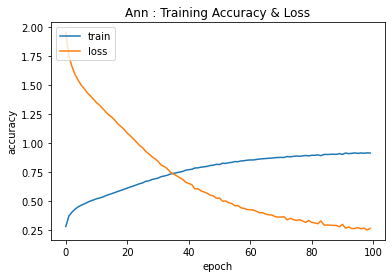

In [69]:
plt.plot(history_ann_model.history['accuracy'])
plt.plot(history_ann_model.history['loss'])

plt.title('Ann : Training Accuracy & Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

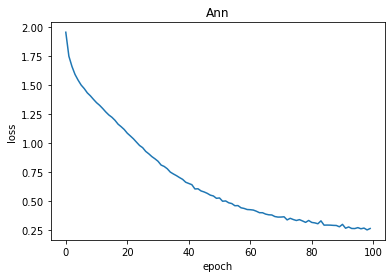

In [63]:
plt.plot(history_ann_model.history['loss'])
plt.title('Ann')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

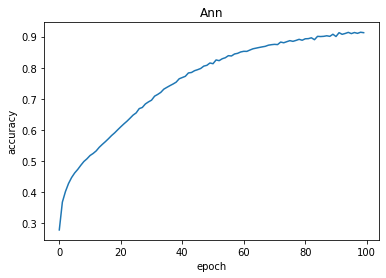

In [64]:
plt.plot(history_ann_model.history['accuracy'])
plt.title('Ann')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.58      0.56      1000
           1       0.63      0.52      0.57      1000
           2       0.38      0.30      0.33      1000
           3       0.29      0.30      0.29      1000
           4       0.41      0.40      0.40      1000
           5       0.35      0.37      0.36      1000
           6       0.49      0.55      0.52      1000
           7       0.54      0.51      0.53      1000
           8       0.57      0.62      0.59      1000
           9       0.51      0.54      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



In [31]:
# mmm

In [32]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn_history = cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6005 - accuracy: 0.4091
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2254 - accuracy: 0.5621
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0811 - accuracy: 0.6158
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9909 - accuracy: 0.6517
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9198 - accuracy: 0.6772
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8656 - accuracy: 0.6957
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8161 - accuracy: 0.7146
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7801 - accuracy: 0.7282: 1s
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7465 - accuracy: 0.7391
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0

In [34]:
cnn_history.params

{'verbose': 1, 'epochs': 50, 'steps': 1563}

In [35]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6653 - accuracy: 0.6829


[1.665305495262146, 0.6829000115394592]

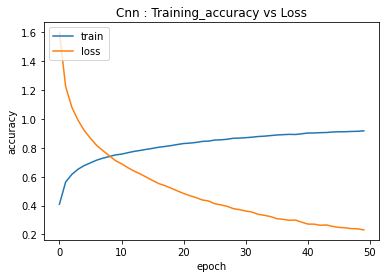

In [68]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['loss'])
# plt.plot(history_ann_model.history['val_acc'])
plt.title('Cnn : Training_accuracy vs Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

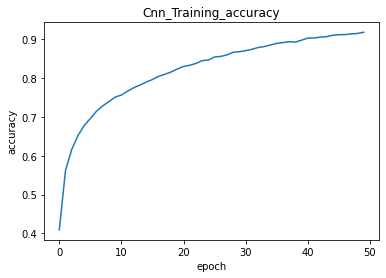

In [65]:
plt.plot(cnn_history.history['accuracy'])

plt.title('Cnn_Training_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

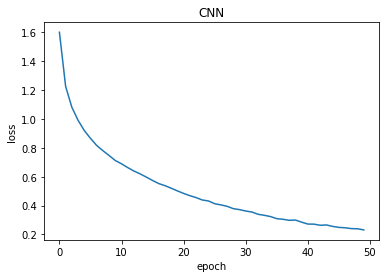

In [67]:
plt.plot(cnn_history.history['loss'])

plt.title('CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
y_pred = cnn.predict(X_test)

y_classes = [np.argmax(element) for element in y_pred]


In [38]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.71      0.70      1000
           1       0.82      0.80      0.81      1000
           2       0.59      0.52      0.55      1000
           3       0.53      0.50      0.51      1000
           4       0.57      0.69      0.62      1000
           5       0.63      0.61      0.62      1000
           6       0.78      0.72      0.75      1000
           7       0.69      0.75      0.72      1000
           8       0.83      0.71      0.77      1000
           9       0.73      0.83      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

